---------------------------------------------------- Start
Point definitions
Define froces in points
Define discretization


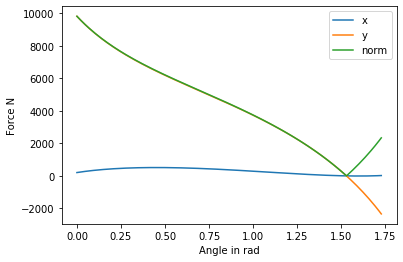

Maximum value Force in x: 513.3030570924868 N
Maximum value Force in y: 9817.144325615096 N
Maximum value Force norm: 9819.281394512756 N
Value at  99.00000000000001  deg Force in x: 21.245346820847033 N
Value at  99.00000000000001  deg Force in y: -2338.9730657274768 N
Value at  99.00000000000001  deg Force norm: 2339.0695515439743 N


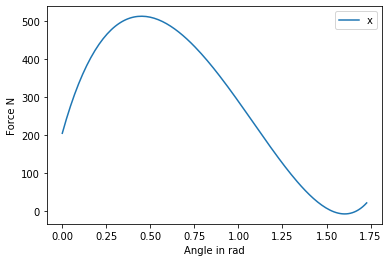

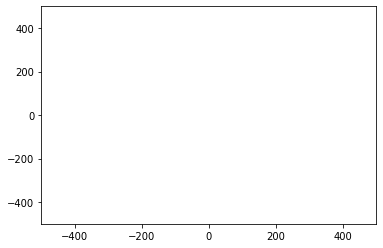

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def compute_rotation_matrix(angle):
    rotation = np.zeros((2,2))

    rotation[0,0] = np.cos(angle)
    rotation[0,1] = -np.sin(angle)
    rotation[1,0] = np.sin(angle)
    rotation[1,1] = np.cos(angle)

    return rotation



print("---------------------------------------------------- Start")
print("Point definitions")
a_0 = np.array([0,          0])
b_0 = np.array([62.5,       0])
c_0 = np.array([469.49,     0])
d_0 = np.array([469.49, 19.01])
e_0 = np.array([62.5,   -62.5])
f_0 = np.array([56,      -374])

print("Define froces in points")
force_d = np.array([0, 85*1.6*9.81])

print("Define discretization")
num_steps = 150
angle = np.linspace(0,np.pi*0.55,num_steps)

force_e = np.zeros((num_steps, 2))

for i, alpha in enumerate(angle):
    rotation = compute_rotation_matrix(alpha)

    d = rotation.dot(d_0)
    e = rotation.dot(e_0)
    e_unit = e /  np.linalg.norm(e)
	
    fe = e - f_0
    fe_unit = fe /  np.linalg.norm(fe)
 
    sin_theta = np.cross(e_unit, fe_unit)

    force_e_norm = (np.cross(d,force_d))/ (np.linalg.norm(e)*sin_theta)
    force_e[i] =force_e_norm * fe_unit


# Plot force by components X and Y at point e
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
fig, ax1 = plt.subplots()
plt.plot(angle, force_e[:,0], label='x')
plt.plot(angle, force_e[:,1], label='y')
norm_force_e = np.zeros((num_steps,1))
for i, force in enumerate(force_e):
    norm_force_e[i] = np.linalg.norm(force)
plt.plot(angle, norm_force_e, label='norm')
ax1.set_ylabel('Force N')
ax1.set_xlabel('Angle in rad')
plt.legend()
plt.savefig('forces_norm.pdf')
plt.show()

print('Maximum value Force in x:', np.amax(force_e[:,0]),'N')
print('Maximum value Force in y:', np.amax(force_e[:,1]),'N')
print('Maximum value Force norm:', np.amax(norm_force_e),'N')


print('Value at ', np.degrees(angle[-1]), ' deg Force in x:', np.amax(force_e[-1,0]),'N')
print('Value at ', np.degrees(angle[-1]), ' deg Force in y:', np.amax(force_e[-1,1]),'N')
print('Value at ', np.degrees(angle[-1]), ' deg Force norm:', np.amax(norm_force_e[-1]),'N')

#------------------------------- Plot force only X
fig, ax1 = plt.subplots()
plt.plot(angle, force_e[:,0], label='x')
norm_force_e = np.zeros((num_steps,1))
ax1.set_ylabel('Force N')
ax1.set_xlabel('Angle in rad')
plt.legend()
plt.savefig('forces_x.pdf')
plt.show()

# Start animation
fig2, ax = plt.subplots()
ax.set_xlim(np.min(force_e[:,1]), np.max(force_e[:,1]))
ax.set_ylim(np.min(force_e[:,1]), np.max(force_e[:,1]))
ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
angle_template = r'angle = %.1f $^\circ$'
angle_text = ax.text(0.68, 0.9, '', transform=ax.transAxes)
force_template = r'force = %.1f $N$'
force_text = ax.text(0.68, 0.8, '', transform=ax.transAxes)

xdata = np.zeros((1,2))
ydata = np.zeros((1,2))
line_force_e, = plt.plot([], [], '-r', linewidth = 4)

data = np.zeros((2,5))
body, = plt.plot([], [], '-ko', markersize = 4, linewidth = 2)

data2 = np.zeros((2,2))
data2[0,0] = f_0[0]
data2[1,0] = f_0[1]
spindle, = plt.plot([], [], '--bo', linewidth = 1)


def init():
    body.set_data([],[])
    line_force_e.set_data([],[])
    angle_text.set_text('')
    force_text.set_text('')
    return 

def update(i):
    rotation = compute_rotation_matrix(angle[i])
    data[0,0] = rotation.dot(a_0)[0]
    data[0,1] = rotation.dot(d_0)[0]
    data[0,2] = rotation.dot(c_0)[0]
    data[0,3] = rotation.dot(e_0)[0]
    data[0,4] = rotation.dot(a_0)[0]
    
    data[1,0] = rotation.dot(a_0)[1]
    data[1,1] = rotation.dot(d_0)[1]
    data[1,2] = rotation.dot(c_0)[1]
    data[1,3] = rotation.dot(e_0)[1]
    data[1,4] = rotation.dot(a_0)[1]

    body.set_data(data[0], data[1])
    # ------------------------------------------------------ 

    xdata[0,0] = rotation.dot(e_0)[0]
    ydata[0,0] = rotation.dot(e_0)[1]

    scale_force = 0.05
    xdata[0,1] = force_e[i,0] * scale_force + rotation.dot(e_0)[0]
    ydata[0,1] = force_e[i,1] * scale_force + rotation.dot(e_0)[1]
    line_force_e.set_data(xdata, ydata)
    # ------------------------------------------------------ 
    data2[0,1] = rotation.dot(e_0)[0]
    data2[1,1] = rotation.dot(e_0)[1]
    spindle.set_data(data2[0], data2[1])


    angle_text.set_text(angle_template % np.degrees(angle[i]))
    force_text.set_text(force_template % np.linalg.norm(force_e[i]))    
    return 

ani = FuncAnimation(fig2, update, num_steps,
                    init_func=init, interval=30, blit=False)
plt.show()

ani.save('force.gif', writer='imagemagick')

